In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df = df.iloc[:,[3,4]].values

#Elbow Curve to find K for K-Means Clustering

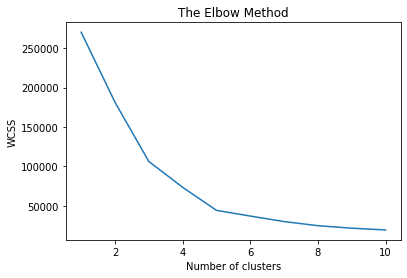

In [7]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)


plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#K-Means Clustering with 5 Clusters

Clustering Metrics: 

clustering_score :  0.5725628995597081
silhouette_score :  0.553931997444648


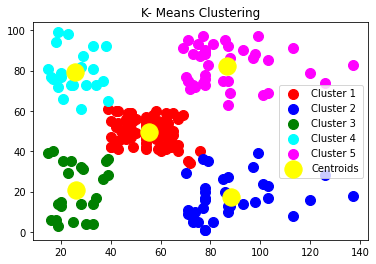

In [10]:
# Fitting K-Means to the dataset and visualizing
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
kmeans.fit(df)
y_kmeans = kmeans.fit_predict(df)
#print(y_kmeans)


#Clustering metrics
#davies_bouldin_score
print("Clustering Metrics: \n")
from sklearn.metrics import davies_bouldin_score
clustering_score = davies_bouldin_score(df, y_kmeans)
print("clustering_score : ",clustering_score)

#silhouette_score
from sklearn.metrics import silhouette_score
silhouette_score = silhouette_score(df, y_kmeans)
print("silhouette_score : ",silhouette_score)


# Visualising the clusters
plt.scatter(df[y_kmeans == 0, 0], df[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(df[y_kmeans == 1, 0], df[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(df[y_kmeans == 2, 0], df[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(df[y_kmeans == 3, 0], df[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(df[y_kmeans == 4, 0], df[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('K- Means Clustering')
plt.legend()
plt.show()